# Modelación de sistemas con ecuaciones diferenciales

Pompeyo Alexander

Jackeline Aguilar

Paulina González

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.funciones import funcion_natalidad
from utils.simulacion import simulacion, generar_reporte
from utils.mortalidad import regresion_mortalidad


df_chile = pd.read_csv("data/poblacionTotal/PoblacionPorEdades_Chile.csv")
df_mexico= pd.read_csv("data/poblacionTotal/PoblacionPorEdades_Mexico.csv")

T_data_cl = df_chile['Year'].values
U_data_cl = df_chile[['J(t)', 'A(t)', 'E(t)']].values

T_data_mx = df_mexico['Year'].values
U_data_mx = df_mexico[['J(t)', 'A(t)', 'E(t)']].values


## Parámetros del Modelo

### Sistema de Ecuaciones:

$$\frac{dJ}{dt} = b(t) \cdot A(t) - m_J \cdot J(t) - \frac{1}{15} \cdot J(t)$$

$$\frac{dA}{dt} = \frac{1}{15} \cdot J(t) - m_A \cdot A(t) - \frac{1}{50} \cdot A(t)$$

$$\frac{dE}{dt} = \frac{1}{50} \cdot A(t) - m_E \cdot E(t)$$

### Otros parámetros:

In [2]:
t_inicial = 2025
t_final = 2050
h = 0.1

b_chile = funcion_natalidad(t_inicial=2025, t_final=2050, b_2025=0.012, b_2050=0.009)
b_mexico = funcion_natalidad(t_inicial=2025, t_final=2050, b_2025=0.016, b_2050=0.012)

poblacion_inicial_chile = {
    'J': U_data_cl[-1, 0],
    'A': U_data_cl[-1, 1],
    'E': U_data_cl[-1, 2]
}

poblacion_inicial_mexico = {
    'J': U_data_mx[-1, 0],
    'A': U_data_mx[-1, 1],
    'E': U_data_mx[-1, 2]
}


## Regresión (Obtener Coeficientes)

### Regresión (Chile)

In [3]:
mortalidad_chile, df_chile_calc = regresion_mortalidad(df_chile)

In [4]:
print(
    f"Jóvenes Chile: "
    f"J(t)={mortalidad_chile['modelo_jovenes']['J(t)']:.5f}, "
    f"A(t)={mortalidad_chile['modelo_jovenes']['A(t)']:.5f}, "
    f"const={mortalidad_chile['modelo_jovenes']['const']:.2f}"
)
print(
    f"Adultos Chile: "
    f"J(t)={mortalidad_chile['modelo_adultos']['J(t)']:.5f}, "
    f"A(t)={mortalidad_chile['modelo_adultos']['A(t)']:.5f}, "
    f"const={mortalidad_chile['modelo_adultos']['const']:.2f}"
)
print(
    f"Mayores Chile: "
    f"A(t)={mortalidad_chile['modelo_mayores']['A(t)']:.5f}, "
    f"E(t)={mortalidad_chile['modelo_mayores']['E(t)']:.5f}, "
    f"const={mortalidad_chile['modelo_mayores']['const']:.2f}"
)


Jóvenes Chile: J(t)=0.01402, A(t)=0.01815, const=-292907.95
Adultos Chile: J(t)=-0.23201, A(t)=-0.03426, const=1442246.56
Mayores Chile: A(t)=0.02074, E(t)=0.01069, const=-204795.48


### Regresión (México)

In [5]:
mortalidad_mexico, df_mexico_calc = regresion_mortalidad(df_mexico)

In [6]:
print(
    f"Jóvenes México: "
    f"J(t)={mortalidad_mexico['modelo_jovenes']['J(t)']:.3f}, "
    f"A(t)={mortalidad_mexico['modelo_jovenes']['A(t)']:.3f}, "
    f"const={mortalidad_mexico['modelo_jovenes']['const']:.2f}"
)
print(
    f"Adultos México: "
    f"J(t)={mortalidad_mexico['modelo_adultos']['J(t)']:.3f}, "
    f"A(t)={mortalidad_mexico['modelo_adultos']['A(t)']:.3f}, "
    f"const={mortalidad_mexico['modelo_adultos']['const']:.2f}"
)
print(
    f"Mayores México: "
    f"A(t)={mortalidad_mexico['modelo_mayores']['A(t)']:.3f}, "
    f"E(t)={mortalidad_mexico['modelo_mayores']['E(t)']:.3f}, "
    f"const={mortalidad_mexico['modelo_mayores']['const']:.2f}"
)

Jóvenes México: J(t)=0.319, A(t)=-0.170, const=1512024.33
Adultos México: J(t)=0.381, A(t)=-0.014, const=-2727904.09
Mayores México: A(t)=-0.045, E(t)=0.632, const=453759.55


# Simulacion (2025-2050)

In [7]:
T_cl, U_cl = simulacion(
    b_chile,
    mortalidad_chile,
    poblacion_inicial_chile,
    t_inicial=t_inicial,
    t_final=t_final,
    h=h
)

T_mx, U_mx = simulacion(
    b_mexico,
    mortalidad_mexico,
    poblacion_inicial_mexico,
    t_inicial=t_inicial, # Usamos 2025 como t_inicial universal
    t_final=t_final,
    h=h
)


 RESULTADOS: CHILE
Población 2025: 20,086,377
Población 2050: 25,051,077
Crecimiento Total: 4,964,700 (24.72%)

--- Desglose por Edad ---
           2025 		 2050
Jóvenes:   3,698,025 	 4,290,854
Adultos:   13,619,165 	 14,461,513
Mayores:   2,769,187 	 6,298,711

 RESULTADOS: MÉXICO
Población 2025: 125,740,638
Población 2050: 33,149,009,445,879
Crecimiento Total: 33,148,883,705,241 (26362904.02%)

--- Desglose por Edad ---
           2025 		 2050
Jóvenes:   31,755,284 	 1,551,826,643
Adultos:   83,663,440 	 499,042,162
Mayores:   10,321,914 	 33,146,958,577,075



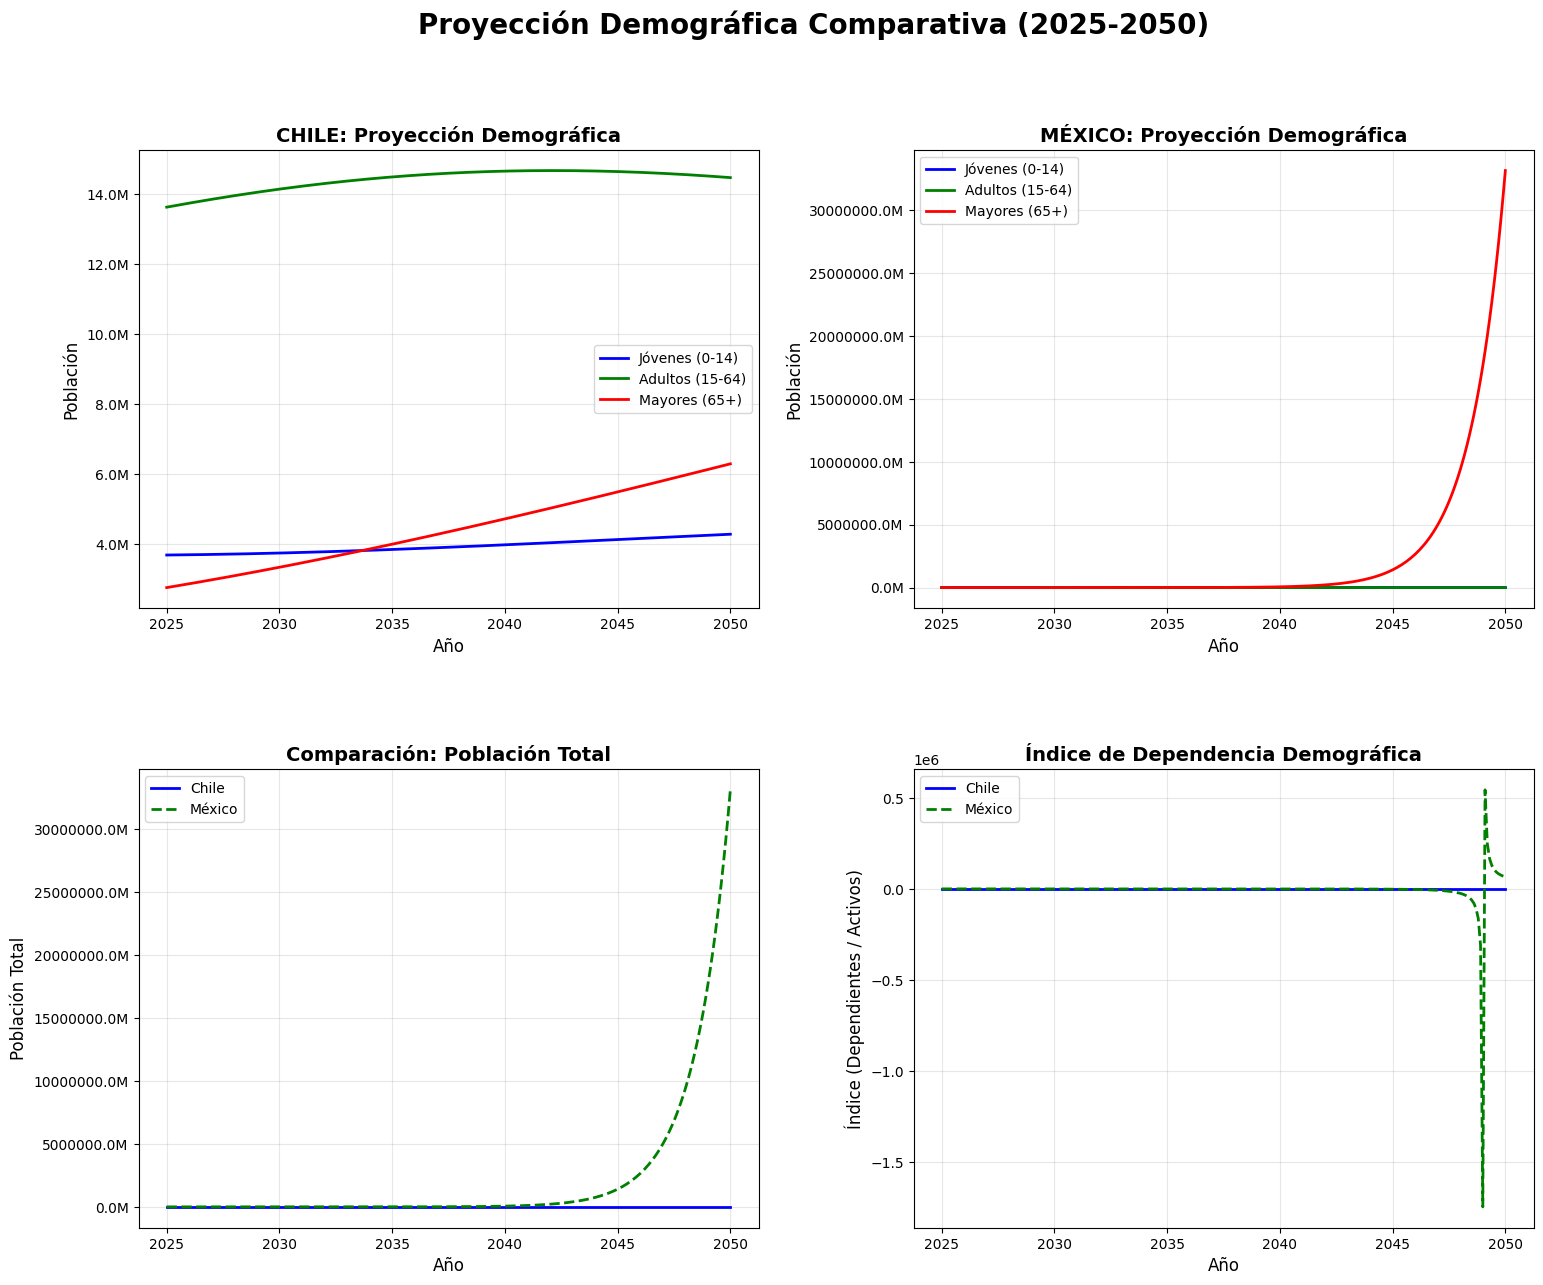

In [8]:
generar_reporte(T_cl, U_cl, T_mx, U_mx)

## Validación Visual (Datos Históricos vs. Modelo)

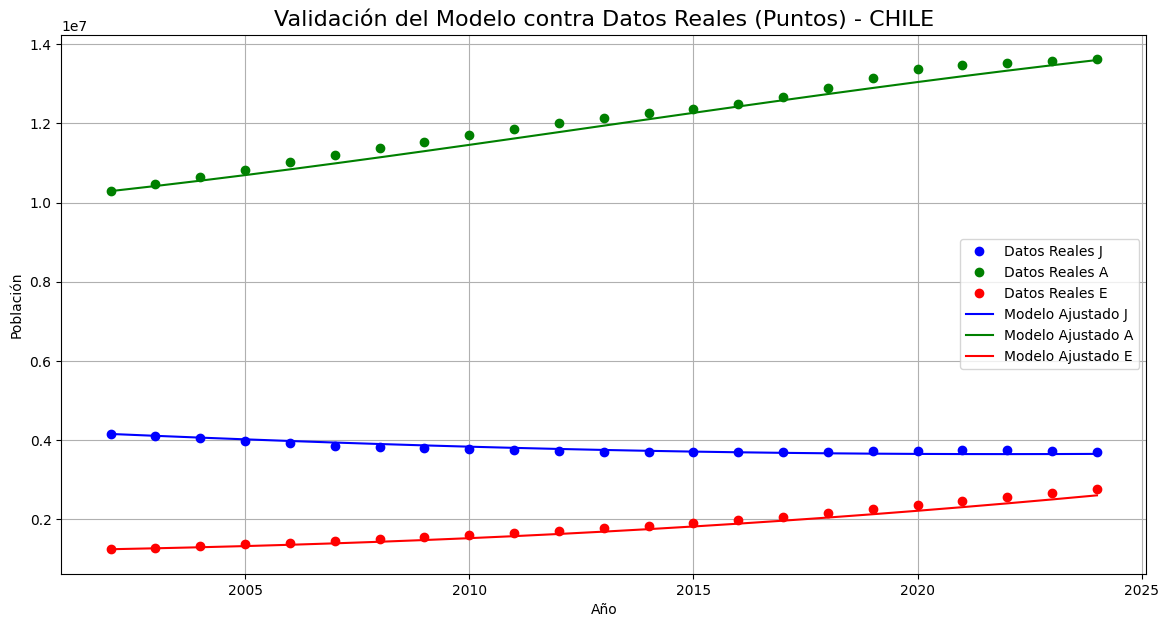

In [9]:
# 1. Simular el modelo en el período histórico
poblacion_inicial_cl_hist = {
    'J': U_data_cl[0, 0],
    'A': U_data_cl[0, 1],
    'E': U_data_cl[0, 2]
}
t_inicial_cl_hist = T_data_cl[0]
t_final_cl_hist = T_data_cl[-1]

T_modelo_cl, U_modelo_cl = simulacion(
    b_chile, 
    mortalidad_chile,
    poblacion_inicial_cl_hist, 
    t_inicial_cl_hist, 
    t_final_cl_hist, 
    h=1.0
)

# 2. Graficar los Datos Reales (puntos) vs. el Modelo (líneas)
plt.figure(figsize=(14, 7))
plt.title('Validación del Modelo contra Datos Reales (Puntos) - CHILE', fontsize=16)

# Datos Reales
plt.plot(T_data_cl, U_data_cl[:, 0], 'bo', label='Datos Reales J')
plt.plot(T_data_cl, U_data_cl[:, 1], 'go', label='Datos Reales A ')
plt.plot(T_data_cl, U_data_cl[:, 2], 'ro', label='Datos Reales E ')

# Modelo (Simulación con coeficientes de regresión)
plt.plot(T_modelo_cl, U_modelo_cl[:, 0], 'b-', label='Modelo Ajustado J')
plt.plot(T_modelo_cl, U_modelo_cl[:, 1], 'g-', label='Modelo Ajustado A')
plt.plot(T_modelo_cl, U_modelo_cl[:, 2], 'r-', label='Modelo Ajustado E')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

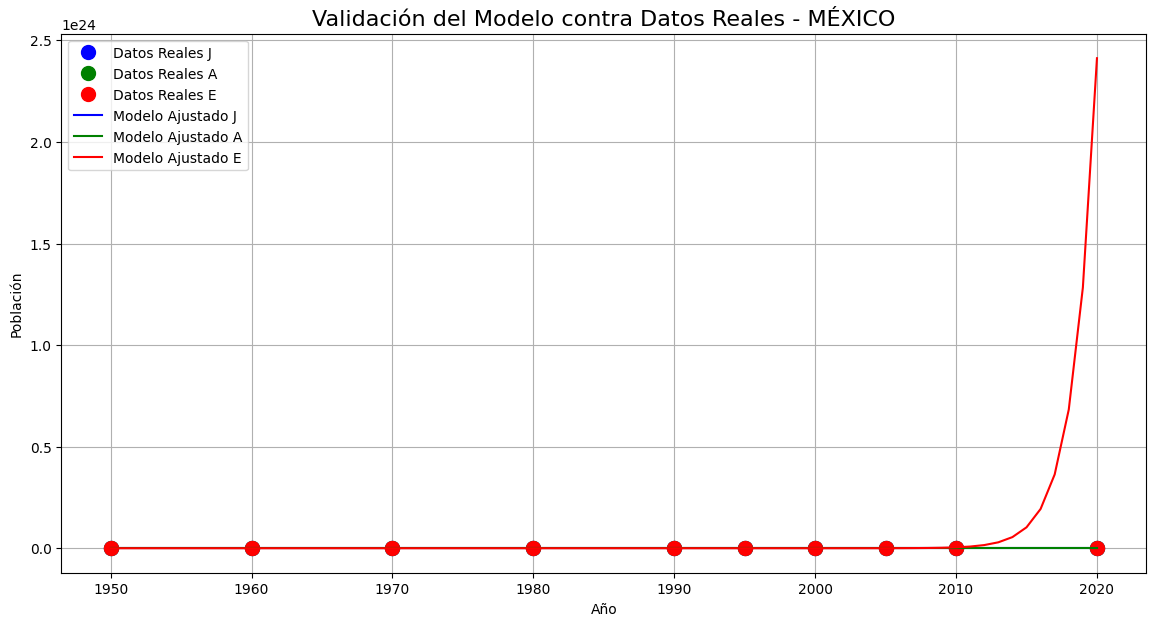

In [10]:
# 1. Simular el modelo en el período histórico
poblacion_inicial_mx_hist = {
    'J': U_data_mx[0, 0], 
    'A': U_data_mx[0, 1], 
    'E': U_data_mx[0, 2]
}
t_inicial_mx_hist = T_data_mx[0]
t_final_mx_hist = T_data_mx[-1]

T_modelo_mx, U_modelo_mx = simulacion(
    b_mexico, 
    mortalidad_mexico,
    poblacion_inicial_mx_hist, 
    t_inicial_mx_hist, 
    t_final_mx_hist, 
    h=1.0 # Paso de 1 año
)

# 2. Graficar los Datos Reales (puntos) vs. el Modelo (líneas)
plt.figure(figsize=(14, 7))
plt.title('Validación del Modelo contra Datos Reales - MÉXICO', fontsize=16)

# Datos Reales
plt.plot(T_data_mx, U_data_mx[:, 0], 'bo', markersize=10, label='Datos Reales J')
plt.plot(T_data_mx, U_data_mx[:, 1], 'go', markersize=10, label='Datos Reales A')
plt.plot(T_data_mx, U_data_mx[:, 2], 'ro', markersize=10, label='Datos Reales E')

# Modelo (Simulación con coeficientes de regresión)
plt.plot(T_modelo_mx, U_modelo_mx[:, 0], 'b-', label='Modelo Ajustado J')
plt.plot(T_modelo_mx, U_modelo_mx[:, 1], 'g-', label='Modelo Ajustado A')
plt.plot(T_modelo_mx, U_modelo_mx[:, 2], 'r-', label='Modelo Ajustado E')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

# Escenario con diferente natalidad

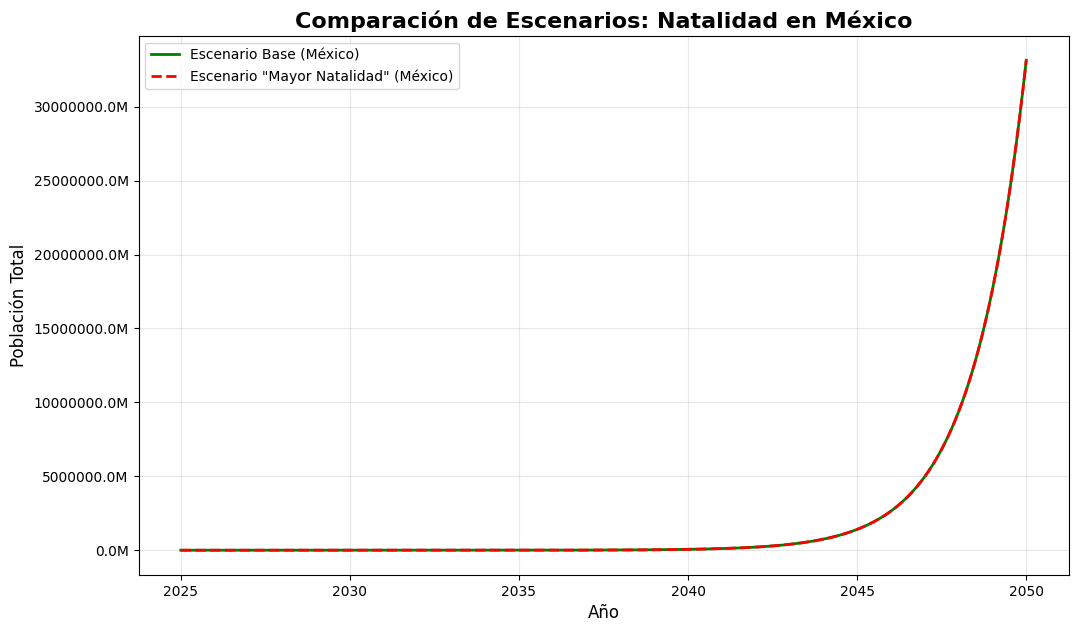

In [11]:
b_mexico_alternativo = funcion_natalidad(
    t_inicial=2025, 
    t_final=2050, 
    b_2025=0.020, # (Antes 0.016)
    b_2050=0.015  # (Antes 0.012)
)


T_alt, U_alt = simulacion(
    b_mexico_alternativo,
    mortalidad_mexico,
    poblacion_inicial_mexico,
    t_inicial=2025,
    t_final=2050,
    h=0.1
)


plt.figure(figsize=(12, 7))
plt.plot(T_mx, U_mx.sum(axis=1), 'g-', linewidth=2, label='Escenario Base (México)')
plt.plot(T_alt, U_alt.sum(axis=1), 'r--', linewidth=2, label='Escenario "Mayor Natalidad" (México)')

plt.xlabel('Año', fontsize=12)
plt.ylabel('Población Total', fontsize=12)
plt.title('Comparación de Escenarios: Natalidad en México', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)


formatter = plt.FuncFormatter(lambda x, p: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()